In our 'reduce_explore.py' we've tried a number of models and a number of different training durations for each. In this notebook we'll explore if any of them are any good.

In [3]:
import os
import pickle

x_test = pickle.load(open("models/sentiment_x_test.pkl","rb"))
y_test = pickle.load(open("models/sentiment_y_test.pkl","rb"))

models = dict()
for dirname, _, filenames in os.walk("models/"):
        for filename in filenames:

            if not "_" in filename and "sentiment" in filename:
                thisFile = os.path.join(dirname, filename)
                thisModel = pickle.load(open(thisFile,"rb"))
                models[filename] = thisModel



Let's look at lbfgs first:

In [4]:
from sklearn.neural_network import MLPRegressor
solver_name = "lbfgs"

errors = dict()
for iter in range(1,19):
    strName = f"sentiment - {solver_name} - {iter}.pkl"
    
    errors[iter] = models[strName].score(x_test,y_test)

print(errors)


{1: -0.2172010692885178, 2: -1.0613208341412652, 3: -2.74046956960932, 4: -3.0652421314797094, 5: -3.0652421314797094, 6: -3.0652421314797094, 7: -3.0652421314797094, 8: -3.0652421314797094, 9: -3.0652421314797094, 10: -3.0652421314797094, 11: -3.0652421314797094, 12: -3.0652421314797094, 13: -3.0652421314797094, 14: -3.0652421314797094, 15: -3.0652421314797094, 16: -3.0652421314797094, 17: -3.0652421314797094, 18: -3.0652421314797094}


OK, so the predictions are terrible, and the model got worse over time. What do the predictions look like?

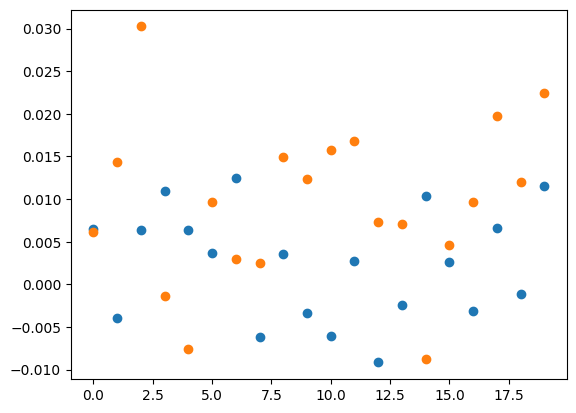

In [5]:
import matplotlib.pyplot as plt
import math

x_values = range(len(y_test))

Y_Predict = models["sentiment - lbfgs - 1.pkl"].predict(x_test)

plt.scatter(x_values[0:20],y_test[0:20])
plt.scatter(x_values[0:20],Y_Predict[0:20])
#plt.ylim(-0.02,0.02)
plt.show()

Bad, let's look at sgd:

In [6]:
from sklearn.neural_network import MLPRegressor
solver_name = "sgd"

errors = dict()
for iter in range(1,19):
    strName = f"sentiment - {solver_name} - {iter}.pkl"
    
    errors[iter] = models[strName].score(x_test,y_test)

print(errors)

{1: -0.567185176352734, 2: -0.49974982330313655, 3: -0.49974982330313655, 4: -0.49974982330313655, 5: -0.49974982330313655, 6: -0.49974982330313655, 7: -0.49974982330313655, 8: -0.49974982330313655, 9: -0.49974982330313655, 10: -0.49974982330313655, 11: -0.49974982330313655, 12: -0.49974982330313655, 13: -0.49974982330313655, 14: -0.49974982330313655, 15: -0.49974982330313655, 16: -0.49974982330313655, 17: -0.49974982330313655, 18: -0.49974982330313655}


Still very bad, converged a bit towards a different wrong answer - but still.

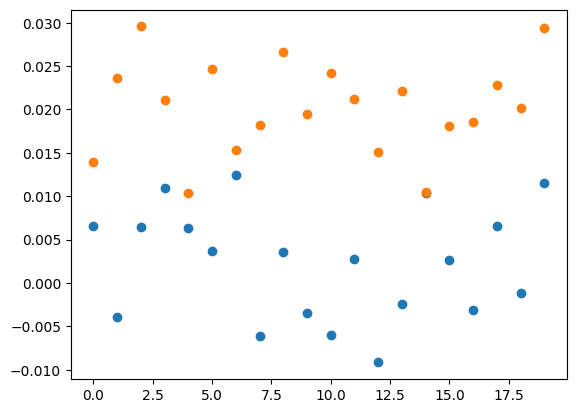

In [7]:
import matplotlib.pyplot as plt
import math

x_values = range(len(y_test))

Y_Predict = models["sentiment - sgd - 3.pkl"].predict(x_test)

plt.scatter(x_values[0:20],y_test[0:20])
plt.scatter(x_values[0:20],Y_Predict[0:20])
#plt.ylim(-0.02,0.02)
plt.show()

OK, that didn't work